# Aula Open Day - Aprendizado de Máquina Clássico - Titanic

Nesta aula, vamos aprender a explorar e visualizar dados utilizando Python, tendo como base o clássico dataset do Titanic. Mais do que apenas gerar gráficos, vamos exercitar nossa capacidade analítica para interpretar visualmente os dados e compreender os principais fatores que influenciaram a sobrevivência dos passageiros.

## **Evolução da Análise: Visualização e Machine Learning**

Inicialmente, realizaremos uma análise exploratória por meio de gráficos e visualizações, utilizando bibliotecas como pandas, matplotlib e seaborn. Iremos usar essas ferramentas para entender como criar representações visuais eficazes, investigando aspectos como gênero, idade, classe social e tarifas pagas.

Em seguida, daremos um passo além ao aplicar técnicas básicas de aprendizado de máquina supervisionado — mais especificamente o algoritmo K-Nearest Neighbors (KNN). Utilizaremos o KNN para construir um modelo preditivo capaz de estimar a sobrevivência dos passageiros com base nas variáveis analisadas. Essa etapa permitirá aos alunos compreender como transformar dados brutos em features relevantes e como avaliar o desempenho de um modelo simples de classificação.

## **Objetivo da Atividade:**

O objetivo desta atividade é duplo: desenvolver habilidades sólidas tanto em análise visual quanto em fundamentos de machine learning. Ao final, os alunos serão capazes de:

* Explorar dados e gerar visualizações informativas;

* Interpretar criticamente os gráficos gerados, propondo ajustes quando necessário;

* Preparar dados para uso em modelos de ML;

* Aplicar o algoritmo KNN para classificar e prever resultados com base em dados históricos;

* Avaliar a acurácia e limitações do modelo construído.

Essa abordagem integrada reforça a importância de unir análise exploratória e técnicas preditivas no processo de tomada de decisão baseada em dados.


In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar o dataset Titanic diretamente do Seaborn
titanic_data = sns.load_dataset('titanic')

In [3]:
# Exibir as primeiras linhas do dataset para entender sua estrutura
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Exibir informações básicas sobre o dataset
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Distribuição de Sobreviventes:

Primeiro, vamos visualizar a distribuição dos sobreviventes para entender a proporção entre aqueles que sobreviveram e aqueles que não sobreviveram:

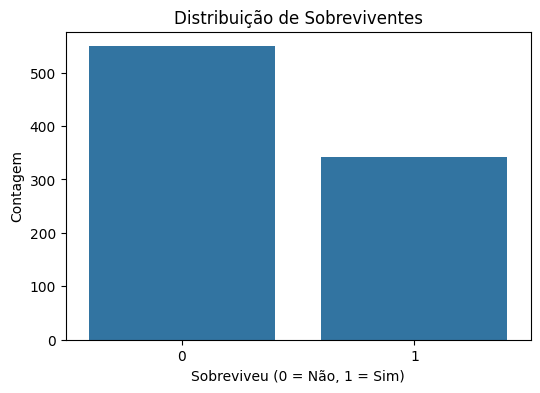

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=titanic_data)
plt.title('Distribuição de Sobreviventes')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

**Interpretação**: Este gráfico de barras nos mostra a contagem absoluta de passageiros que sobreviveram versus aqueles que não sobreviveram. Uma visualização inicial como essa é essencial para entender o desbalanceamento dos dados, o que pode ser crucial ao construir modelos preditivos.

## Distribuição de Idade dos Passageiros:

Analisar a distribuição da idade pode revelar insights sobre a demografia dos passageiros e como ela se relaciona com a sobrevivência:

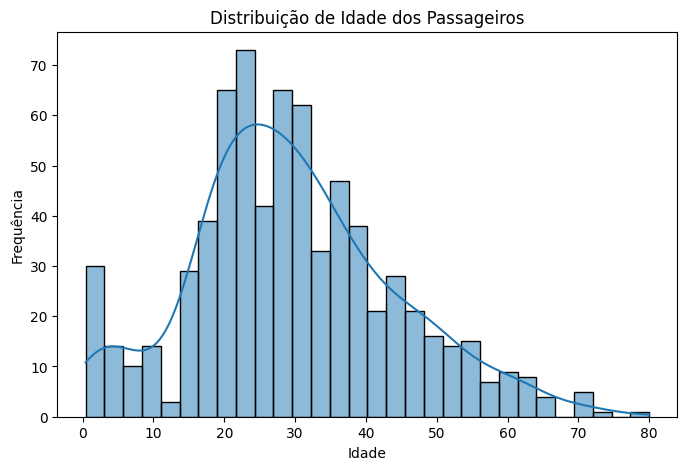

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic_data['age'].dropna(), bins=30, kde=True)
plt.title('Distribuição de Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


**Interpretação**: O histograma com uma linha de densidade (KDE) ajuda a visualizar a distribuição de idades, identificando a presença de picos, como crianças pequenas e adultos em idade média. Análises adicionais poderiam investigar se certas faixas etárias tinham uma maior probabilidade de sobrevivência.

## Sobrevivência por Gênero:

Vamos explorar como o gênero influenciou a taxa de sobrevivência:

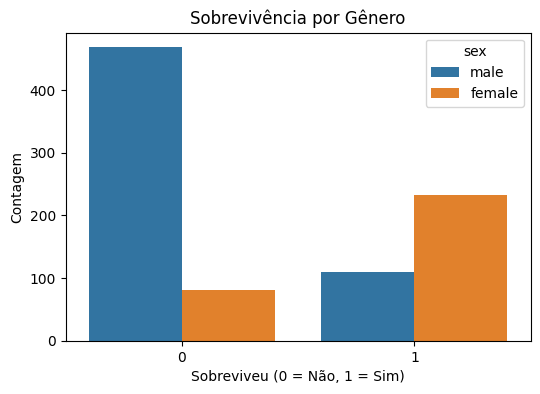

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', hue='sex', data=titanic_data)
plt.title('Sobrevivência por Gênero')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()


**Interpretação**: Este gráfico de barras empilhadas destaca a diferença significativa nas taxas de sobrevivência entre homens e mulheres. No Titanic, havia uma regra de “mulheres e crianças primeiro” para os botes salva-vidas, o que explica a maior taxa de sobrevivência para mulheres. Esse insight é importante ao considerar variáveis de gênero em análises preditivas.

## Classe de Passageiros e Taxa de Sobrevivência:

Explorar a relação entre a classe social dos passageiros (1ª, 2ª, 3ª classe) e suas taxas de sobrevivência:

/tmp/ipython-input-8-3546462108.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=titanic_data, ci=None)


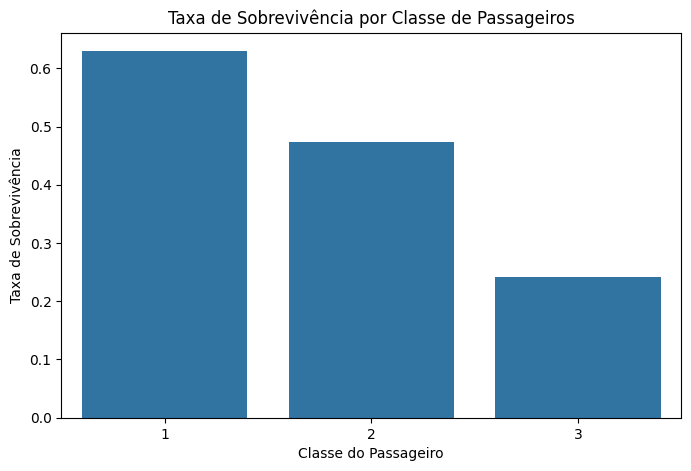

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=titanic_data, ci=None)
plt.title('Taxa de Sobrevivência por Classe de Passageiros')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Taxa de Sobrevivência')
plt.show()


**Interpretação**: Este gráfico de barras mostra que passageiros da 1ª classe tinham uma maior taxa de sobrevivência comparado com aqueles da 2ª e 3ª classe. Esse padrão provavelmente reflete o acesso mais rápido e fácil aos botes salva-vidas para passageiros em classes mais altas. Isso pode indicar que a classe social era um fator crítico na probabilidade de sobrevivência.

## Gráfico de Dispersão entre Idade e Tarifa:

A relação entre a idade dos passageiros e a tarifa paga, colorida pela sobrevivência, pode revelar tendências interessantes:

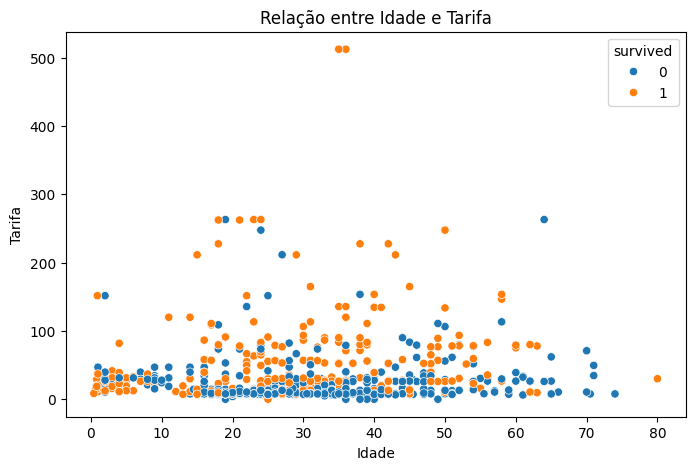

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic_data)
plt.title('Relação entre Idade e Tarifa')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()


**Interpretação**: Este gráfico de dispersão permite observar se há uma correlação entre a tarifa paga e a probabilidade de sobrevivência. Notamos que passageiros que pagaram tarifas mais altas (provavelmente da 1ª classe) tinham uma maior chance de sobrevivência, sugerindo uma correlação entre status econômico e sobrevivência. Outliers como tarifas muito altas e baixas podem indicar a presença de passageiros em cabines de luxo ou tarifas subsidiadas.

---

# **Introdução ao KNN (K-Nearest Neighbors)**

O KNN (K-Nearest Neighbors) é um dos algoritmos mais simples e intuitivos de aprendizado de máquina supervisionado. Ele é usado tanto para classificação (descobrir a qual grupo algo pertence) quanto para regressão (prever um valor numérico). Vamos focar no uso do KNN para classificação.

## **Como o KNN funciona?**

Imagine que você acabou de conhecer uma pessoa nova e quer adivinhar se ela gosta de esportes. Você olha para outras pessoas parecidas com ela (em idade, gênero, hábitos, etc.) e observa se essas pessoas gostam ou não de esportes.

### O KNN faz exatamente isso:

* Recebe um novo exemplo (por exemplo, um passageiro do Titanic).

* Procura os "K" vizinhos mais próximos dele no conjunto de dados — ou seja, os mais parecidos com base nas características (idade, classe, sexo, etc.).

* Vota entre os vizinhos: se a maioria sobreviveu, o novo exemplo provavelmente também sobreviveria. Se a maioria não sobreviveu, ele também não sobreviveria.

### Termos Importantes

* **K**: número de vizinhos considerados. Exemplo: K = 3 → o algoritmo olha os 3 mais próximos.

* **Distância**: é como o algoritmo mede quem está mais "próximo". A distância mais usada é a Euclidiana (como a régua entre dois pontos).

* **Classificação**: prever a categoria de algo (ex: sobreviveu ou não).

* **Regressão**: prever um valor numérico (ex: nota de um aluno).

### Exemplo simples

Imagine o gráfico abaixo, com pessoas que sobreviveram ou não no Titanic:

🟢 = Sobreviveu
🔴 = Não Sobreviveu
❓ = Novo passageiro

```
        🟢         🔴
          
    🔴     ❓      🟢
          
        🟢         🔴
```

Se K = 3, o algoritmo olha os 3 pontos mais próximos. Suponha que sejam dois 🟢 e um 🔴 → o novo passageiro será classificado como sobreviveu.

**Vantagens do KNN**

* Simples e fácil de entender.

* Não exige treinamento complexo (os dados são salvos e usados diretamente).

* Funciona bem quando as classes estão bem separadas.

**Desvantagens do KNN**

* Fica lento com muitos dados (porque precisa calcular a distância de todos os pontos).

* Sensível a dados irrelevantes ou com escalas diferentes.

* Não funciona bem em bases com muitos ruídos ou muitas variáveis (alta dimensionalidade).

## **KNN no Titanic**

No caso do dataset Titanic, podemos usar o KNN para prever se um passageiro sobreviveu ou não com base em:

* Idade

* Sexo

* Classe social

* Valor pago na passagem

* Número de familiares a bordo

Assim, ao receber os dados de um novo passageiro, o KNN buscará os passageiros mais parecidos no conjunto de dados e decidirá sua possível sobrevivência com base nisso.

## **Conclusão**

O KNN é como um “conselheiro por proximidade”: para tomar uma decisão, ele olha o que pessoas parecidas fizeram no passado. Por isso, ele é ótimo para começar no mundo do aprendizado de máquina.

In [10]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Selecionar features e target
features = ['sex', 'age', 'pclass', 'fare']
df = titanic_data[features + ['survived']].dropna()

# Transformar dados categóricos em numéricos
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Separar variáveis independentes (X) e variável alvo (y)
X = df.drop('survived', axis=1)
y = df['survived']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados (muito importante para o KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = knn.predict(X_test_scaled)

# Avaliar desempenho
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Matriz de Confusão:
 [[105  21]
 [ 28  61]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       126
           1       0.74      0.69      0.71        89

    accuracy                           0.77       215
   macro avg       0.77      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



 --------- Nova Amostra:
   sex  age  pclass   fare
0    1   29       1  100.0

Resultado da previsão: ✅ Sobreviveu
Probabilidade (sobreviveu): 1.00
Probabilidade (não sobreviveu): 0.00


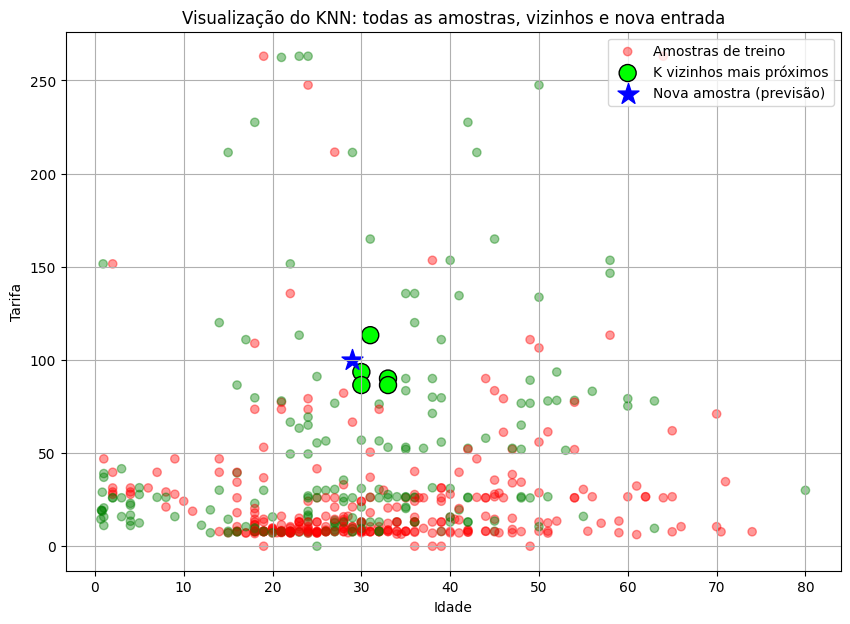

In [22]:
# Nova amostra fictícia
nova_amostra = pd.DataFrame({
    'sex': [1],       # 1 = female
    'age': [29],
    'pclass': [1],
    'fare': [100.0]
})

# Padronizar a nova amostra
nova_amostra_scaled = scaler.transform(nova_amostra)

# Previsão com KNN
predicao = knn.predict(nova_amostra_scaled)
proba = knn.predict_proba(nova_amostra_scaled)

# 🧾 Mostrar resultado
print(" --------- Nova Amostra:")
print(nova_amostra)
print()
print(f"Resultado da previsão: {'✅ Sobreviveu' if predicao[0] == 1 else '❌ Não sobreviveu'}")
print(f"Probabilidade (sobreviveu): {proba[0][1]:.2f}")
print(f"Probabilidade (não sobreviveu): {proba[0][0]:.2f}")


# Obter vizinhos mais próximos
distancias, indices_vizinhos = knn.kneighbors(nova_amostra_scaled)
vizinhos_df = X_train.iloc[indices_vizinhos[0]].copy()
vizinhos_df['sobreviveu'] = y_train.iloc[indices_vizinhos[0]].values

# Criar base completa com rótulo para cor
amostras_completas = X_train.copy()
amostras_completas['sobreviveu'] = y_train

# Paleta de cores
cores_amostras = ['green' if s == 1 else 'red' for s in amostras_completas['sobreviveu']]
cores_vizinhos = ['lime' if s == 1 else 'darkred' for s in vizinhos_df['sobreviveu']]

# Plotagem
plt.figure(figsize=(10, 7))

# 1. Plotar todas as amostras de treino
plt.scatter(amostras_completas['age'], amostras_completas['fare'],
            c=cores_amostras, alpha=0.4, label='Amostras de treino')

# 2. Destacar os vizinhos mais próximos
plt.scatter(vizinhos_df['age'], vizinhos_df['fare'],
            c=cores_vizinhos, edgecolor='black', s=150, label='K vizinhos mais próximos')

# 3. Plotar a nova amostra
plt.scatter(nova_amostra['age'], nova_amostra['fare'],
            c='blue', s=250, marker='*', label='Nova amostra (previsão)')

# Finalização do gráfico
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.title('Visualização do KNN: todas as amostras, vizinhos e nova entrada')
plt.grid(True)
plt.legend()
plt.show()


<img src="https://i.chzbgr.com/full/9874864896/h8412A91E/lets-be-honest-there-room-2" height="600" />

In [ ]:
!pip install openai json5 --quiet

In [ ]:
import os
from openai import AzureOpenAI
import json, json5
import base64
from PIL import Image, ImageDraw, ImageFont
from google.colab import files

In [ ]:
def loads_jsonclean(input: str):
    """ Função para ler Jsons do LLM
    """
    first_bracket = input.find('{')
    last_bracket = input.rfind('}')
    if first_bracket == -1 or last_bracket == -1:
        return None
    json_str = input[first_bracket:last_bracket + 1]
    try:
        return json5.loads(json_str)
    except Exception as e:
        raise e

In [ ]:
def resized_img(file_name: str) -> str:
    """ Função para redimensionar imagens grandes
    """
    img = Image.open(file_name)
    width, height = img.size
    if width <= 600 or height <= 400:
        return file_name

    resized_img = img.resize((600, 400))
    file_name_output = "resized_" + file_name
    resized_img.save(file_name_output)
    print(f"Image resized to 600x400 and saved as '{file_name_output}'")
    return file_name_output

# Upload de Imagem

In [ ]:
# Célula para fazer Upload de um arquivo de imagem
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'Arquivo recebido "{fn}" com {len(uploaded[fn])} bytes')
  fn_resized = resized_img(fn)
  print(f'Arquivo redimensionado "{fn_resized}"')

with Image.open(fn_resized) as img:
  display(img)

# Extração de características com LLM

In [ ]:

subscription_key = "" # @param {"type":"string"}
azure_endpoint="https://pf109-mdnt0apr-eastus2.cognitiveservices.azure.com/" # @param {"type":"string"}
api_version="2024-12-01-preview" # @param {"type":"string"}
deployment = "gpt-4.1"# @param {"type":"string"}
#deployment = "gpt-4o"# @param {"type":"string"}

client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=azure_endpoint,
    api_key=subscription_key,
)

In [ ]:
# Chamada do LLM, e armazenamento do retorno em `completion`
completion = client.chat.completions.create(
    model=deployment,
    messages=chat_prompt,
    max_tokens=800,
    temperature=0.7,
    top_p=0.95,
    frequency_penalty=0,
    presence_penalty=0,
    stop=None,
    stream=False
)

In [ ]:
#print(f"Retorno completo do LLM: \n{completion.to_json()}")

print(f"Custo em Tokens: {json.loads(completion.to_json())['usage']}\n")

# Variável com a parte mais importante do retorno
completion_content = json.loads(completion.to_json())["choices"][0]['message']['content']
pessoas_js = loads_jsonclean(completion_content)

# Display do Json de Pessoa
display( pessoas_js )